# Explanatory Data Analysis

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import gc
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")
import jpegio as jio

## Input Images

- Cover/ contains 75k unaltered images meant for use in training.
- JMiPOD/ contains 75k examples of the JMiPOD algorithm applied to the cover images.
- JUNIWARD/contains 75k examples of the JUNIWARD algorithm applied to the cover images.
- UERD/ contains 75k examples of the UERD algorithm applied to the cover images.

In [2]:
Cover_DIR = '../input/alaska2-image-steganalysis/Cover/'
JMiPOD_DIR = '../input/alaska2-image-steganalysis/JMiPOD/'
JUNIWARD_DIR = '../input/alaska2-image-steganalysis/JUNIWARD/'
UERD_DIR = '../input/alaska2-image-steganalysis/UERD/'

IMG_NAMES = sorted(os.listdir(Cover_DIR))
print(len(IMG_NAMES))

75000


## Plot Original Images

In [3]:
def plot_images(n=2):
    nrows = n
    ncols = 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, int(nrows*2.5)))
    for i, ax in enumerate(range(nrows)):
        img_name = IMG_NAMES[i]
        img0 = plt.imread(os.path.join(Cover_DIR    ,img_name))
        img1 = plt.imread(os.path.join(JMiPOD_DIR   ,img_name))
        img2 = plt.imread(os.path.join(JUNIWARD_DIR ,img_name))
        img3 = plt.imread(os.path.join(UERD_DIR     ,img_name))
        axes[i, 0].imshow(img0)
        axes[i, 1].imshow(img1)
        axes[i, 2].imshow(img2)
        axes[i, 3].imshow(img3)
        axes[i, 0].set(ylabel=img_name)
    
    for i, name in enumerate(['Cover', 'JMiPOD', 'JUNIWARD', 'UERD']):
        axes[0, i].set(title=name)
    
    for ax in axes.flat:
        ax.set(xticks=[], yticks=[])
    
    plt.show()

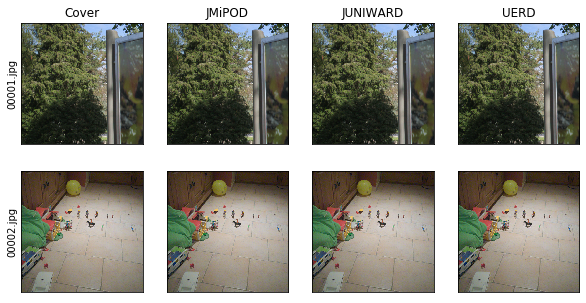

In [4]:
plot_images(n=2)

## Jpeg Image Discrete Cosine Transform Coefficient

In [5]:
def plot_dct_images(num=0):
    img_name = IMG_NAMES[num]
    print(img_name)
    
    nrows=4
    ncols=4
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, int(nrows*2.5)))
    
    # uint8
    img0 = plt.imread(os.path.join(Cover_DIR    ,img_name))
    img1 = plt.imread(os.path.join(JMiPOD_DIR   ,img_name))
    img2 = plt.imread(os.path.join(JUNIWARD_DIR ,img_name))
    img3 = plt.imread(os.path.join(UERD_DIR     ,img_name))
    axes[0, 0].imshow(img0)
    axes[0, 1].imshow(img1)
    axes[0, 2].imshow(img2)
    axes[0, 3].imshow(img3)
    
    # int32
    jimg0 = jio.read(os.path.join(Cover_DIR    ,img_name))
    jimg1 = jio.read(os.path.join(JMiPOD_DIR   ,img_name))
    jimg2 = jio.read(os.path.join(JUNIWARD_DIR ,img_name))
    jimg3 = jio.read(os.path.join(UERD_DIR     ,img_name))
    
    for i in range(3):
        axes[i+1, 0].imshow(jimg0.coef_arrays[i])
        axes[i+1, 1].imshow(jimg1.coef_arrays[i])
        axes[i+1, 2].imshow(jimg2.coef_arrays[i])
        axes[i+1, 3].imshow(jimg3.coef_arrays[i])
    
    for i, name in enumerate(['Cover', 'JMiPOD', 'JUNIWARD', 'UERD']):
        axes[0, i].set(title=name)
    
    for i, name in enumerate(['pixel', 'L DCT', 'Cb DCT', 'Cr DCT']):
        axes[i, 0].set(ylabel=name)
    
    for ax in axes.flat:
        ax.set(xticks=[], yticks=[])
    
    plt.show()

00001.jpg


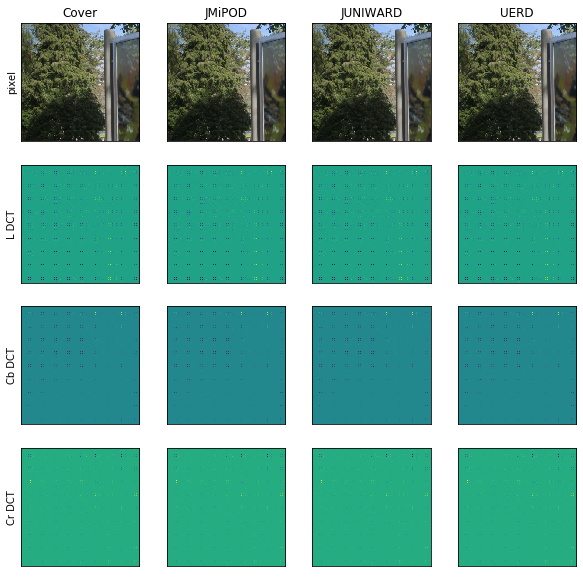

In [6]:
plot_dct_images(num=0)

In [7]:
def plot_dct_diff(num=0):
    img_name = IMG_NAMES[num]
    print(img_name)
    
    nrows=4
    ncols=4
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, int(nrows*2.5)))
    
    # uint8
    img0 = plt.imread(os.path.join(Cover_DIR    ,img_name))
    img1 = plt.imread(os.path.join(JMiPOD_DIR   ,img_name))
    img2 = plt.imread(os.path.join(JUNIWARD_DIR ,img_name))
    img3 = plt.imread(os.path.join(UERD_DIR     ,img_name))
    axes[0, 0].imshow(img0)
    axes[0, 1].imshow(abs(img1 - img0))
    axes[0, 2].imshow(abs(img2 - img0))
    axes[0, 3].imshow(abs(img3 - img0))
    
    # int32
    jimg0 = jio.read(os.path.join(Cover_DIR    ,img_name))
    jimg1 = jio.read(os.path.join(JMiPOD_DIR   ,img_name))
    jimg2 = jio.read(os.path.join(JUNIWARD_DIR ,img_name))
    jimg3 = jio.read(os.path.join(UERD_DIR     ,img_name))
    for i in range(3):
        axes[i+1, 0].imshow(jimg0.coef_arrays[i])
        axes[i+1, 1].imshow(abs(jimg1.coef_arrays[i] - jimg0.coef_arrays[i]), cmap='gray')
        axes[i+1, 2].imshow(abs(jimg2.coef_arrays[i] - jimg0.coef_arrays[i]), cmap='gray')
        axes[i+1, 3].imshow(abs(jimg3.coef_arrays[i] - jimg0.coef_arrays[i]), cmap='gray')
    
    for i, name in enumerate(['Cover', 'JMiPOD - Cover', 'JUNIWARD - Cover', 'UERD - Cover']):
        axes[0, i].set(title=name)
    
    for i, name in enumerate(['pixel diff', 'L DCT diff', 'Cb DCT diff', 'Cr DCT diff']):
        axes[i, 0].set(ylabel=name)
    
    for ax in axes.flat:
        ax.set(xticks=[], yticks=[])
    
    plt.show()

00001.jpg


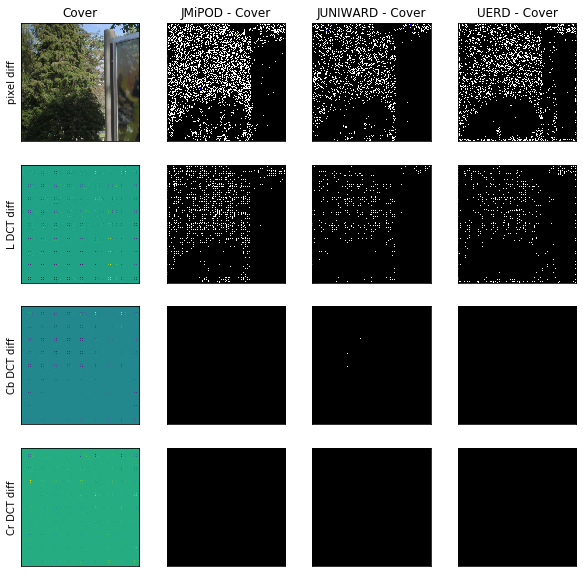

In [8]:
plot_dct_diff(num=0)

00002.jpg


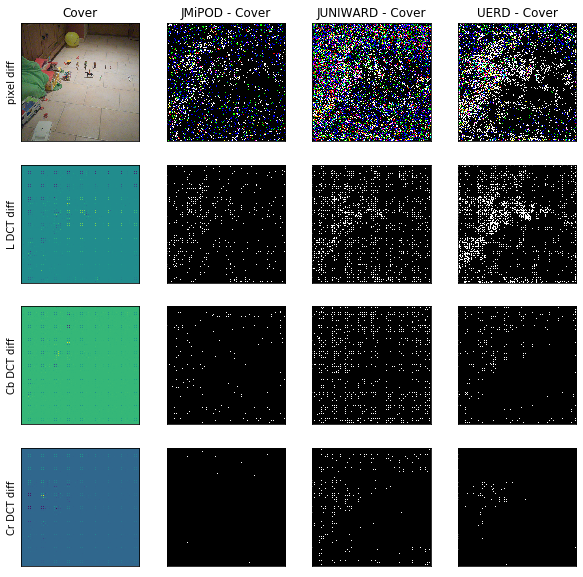

In [9]:
plot_dct_diff(num=1)

00003.jpg


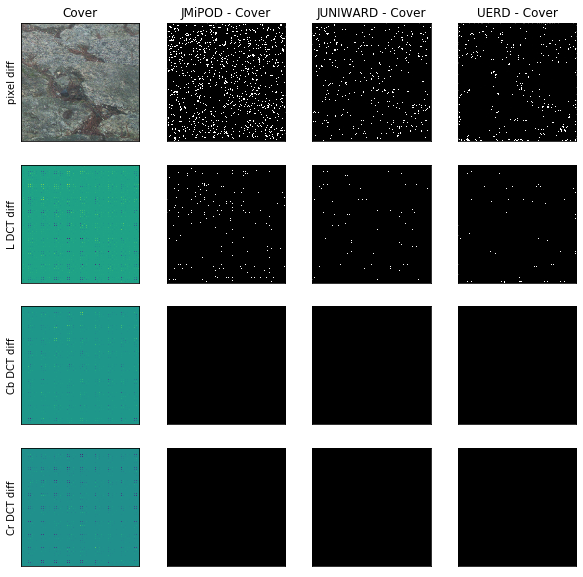

In [10]:
plot_dct_diff(num=2)

00004.jpg


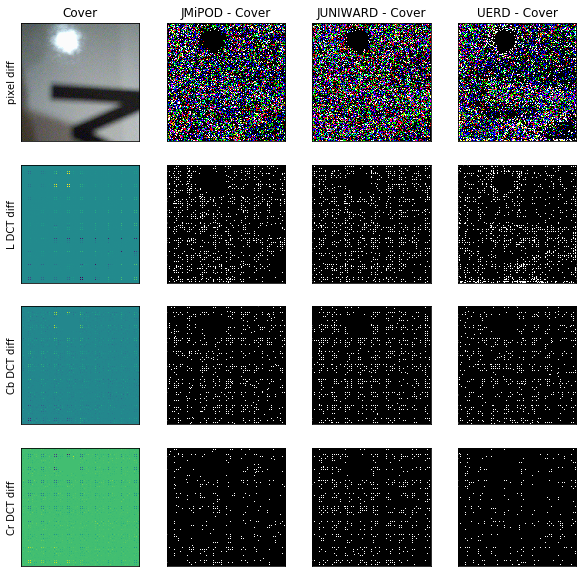

In [11]:
plot_dct_diff(num=3)

## Histgram


channel1 : (299118, 25615710, 299572)
channel2 : (10569, 26193228, 10603)
channel3 : (6411, 26201647, 6342)


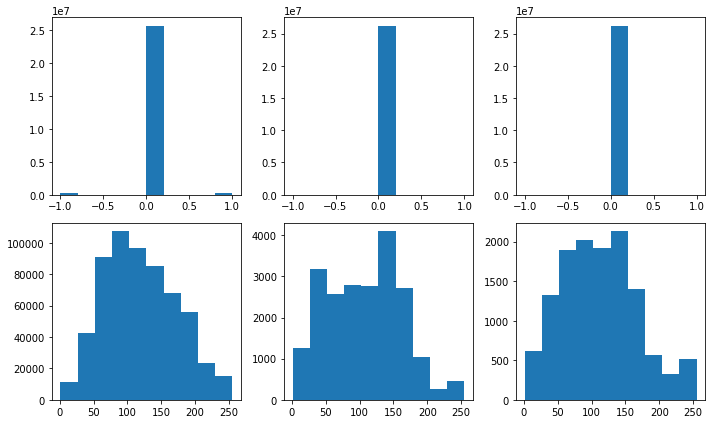

In [12]:
n_images = 100

np_DCT_diff = np.zeros([n_images, 512, 512, 3])
np_diff_loc = np.zeros([n_images, 512, 512, 3])

for n in tqdm(range(n_images)):
    img_name = IMG_NAMES[n]
    jimg0 = jio.read(os.path.join(Cover_DIR  ,img_name))
    #jimg1 = jio.read(os.path.join(JMiPOD_DIR ,img_name))
    #jimg1 = jio.read(os.path.join(JUNIWARD_DIR ,img_name))
    jimg1 = jio.read(os.path.join(UERD_DIR ,img_name))
    npimg0 = np.array(Image.open(os.path.join(Cover_DIR  ,img_name)))
    for c in range(3):
        np_DCT_diff[n, :, :, c] = jimg1.coef_arrays[c] - jimg0.coef_arrays[c]
        np_diff_loc[n, :, :, c] = npimg0[:, :, c] * (np_DCT_diff[n, :, :, c]!=0)

for c in range(3):
    c_DCT_diff = np_DCT_diff[:,:,:,c].flatten()
    print(f'channel{c+1} : ({np.where(c_DCT_diff==-1)[0].shape[0]}, {np.where(c_DCT_diff==0)[0].shape[0]}, {np.where(c_DCT_diff==1)[0].shape[0]})')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
for c in range(3):
    c_diff_loc = np_diff_loc[:,:,:,c].flatten()
    axes[0, c].hist(np_DCT_diff[:,:,:,c].flatten())
    axes[1, c].hist(c_diff_loc[np.where(c_diff_loc!=0)])
plt.tight_layout()
plt.show()

DCT係数に変更があったピクセルのRGB値のヒストグラム

In [20]:
jimg0.coef_arrays[0]

array([[-391,    1,    1, ...,    1,   -2,    2],
       [  -2,    1,    1, ...,    1,    2,    1],
       [   1,    0,    0, ...,    2,    0,   -2],
       ...,
       [   0,    0,   -1, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int32)

In [21]:
jimg0.coef_arrays[1]

array([[-21,   1,   0, ...,   0,   0,   0],
       [  0,   0,  -1, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int32)

In [22]:
jimg0.coef_arrays[2]

array([[ 8,  1,  1, ...,  0,  0,  1],
       [-1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0, -1,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

## JPEG Compression Rate

In [56]:
n_images = len(IMG_NAMES)
FILE_SIZE = [None] * n_images
image_size = 512 * 512 * 3

for n in tqdm(range(n_images)):
    img_name = IMG_NAMES[n]
    fsize = os.path.getsize(os.path.join(Cover_DIR  ,img_name))
    #fsize = np.log10(fsize)
    FILE_SIZE[n] = fsize / image_size

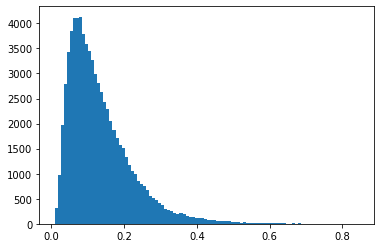

In [57]:
plt.hist(FILE_SIZE, bins=100)
plt.show()